In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import string

from collections import Counter

import nltk, re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Data Analysis steps:

<ol>
    <li> Define the question  </li>
    <li> Define the ideal data set </li>
    <li> Obtain data </li>
    <li> Clean the data </li>
    <li> Exploratory Data Analysis </li>
    <li> Statistical Prediction/modeling </li>
    <li> Interpret results </li>
    <li> Challenge results </li>
    <li> Communicate results </li>
    <li> Build a Data Product </li>
</ol>


## Step 1: Define the Question(s)

<ul>
    <li>What was the most common issue a customer had towards airlines? </li>
</ul>

<hr>

## Step 2 & 3: Identify and Obtain the Data

<div> Import Dataset </div>

In [2]:
df = pd.read_csv('twcs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


<hr>
<h3> Dataset contains information about discussion between a customer and company chatbots. </h3>
<p> tweet_id: Unique ID for tweet => Generates every tweet</p>
<p> author_id: Unique username of the author </p>
<p> inbound: True => Represents the customer sending message; False => Represents chatbot responses </p>
<p> created_at: Date at which post/message was created or sent </p>
<p> text: Message/Text sent </p>
<p> response_tweet_id: tweet_id(s) that responded to the current tweet </p>
<p> in_response_to_tweet_id: tweet_id(s) that the current tweet is responding to </p>
<hr>

In [3]:
df.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


## Step 4 & 5: Clean the Data & Exploratory Data Analysis

<hr>

<h4> Ideal Dataset Contains the following: </h4>

<ul>
    <li> Filtered to only Airlines </li>
    <li> Cleaned text data to simpliest words </li>
    <li> Data is wrangled to show original message and response in same row </li>
    <li> Correct data types for all columns </li>
    <li> New Column to identify sentiment of the text </li>
    <li> Fill in null values </li>
    <li> Eliminate duplicate values </li>
</ul>

<hr>

<h4> Clean Text Data </h4>

<ul>
    <li> Isolate text data </li>
    <li> Lower case all words </li>
    <li> Remove stop words (i, me, why, etc.) </li>
    <li> Remove puncuation </li>
    <li> Remove common words </li>
    <li> Remove rare words </li>
    <li> Remove emojis </li>
    <li> Remove URLs </li>
</ul>

<div> Download nltk packages to help with cleaning </div>

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Crolw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Crolw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Crolw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<div> Isolate Text Data </div>

In [5]:
textDF = df[['text']]
textDF.head(5)

,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.


<div> Change all words to lowercase </div>

In [6]:
textDF['text_lower'] = textDF.loc[:,'text'].str.lower()
textDF.head(5)

C:\Users\Crolw\AppData\Local\Temp\ipykernel_13672\3470515980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textDF['text_lower'] = textDF.loc[:,'text'].str.lower()


,text,text_lower
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...
4,@sprintcare I did.,@sprintcare i did.


<div> Remove Puncuation </div>

In [7]:
punctuations = string.punctuation
print(punctuations)

%timeit
def remove_punctuations(text):
    return text.translate(str.maketrans('','',punctuations))
    

textDF['text_wo_punctuations'] = textDF['text_lower'].apply(lambda text: remove_punctuations(text))
textDF.head(5)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


C:\Users\Crolw\AppData\Local\Temp\ipykernel_13672\545002421.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textDF['text_wo_punctuations'] = textDF['text_lower'].apply(lambda text: remove_punctuations(text))


,text,text_lower,text_wo_punctuations
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did


<div> Remove Emojis </div>

In [8]:
emojiPattern = re.compile("["u"\U0001F600-\U0001F64F""]+", flags=re.UNICODE)
textDF['text_wo_emojis'] = textDF['text_wo_punctuations'].apply(lambda text: emojiPattern.sub(r'', text))
textDF.tail(5)

C:\Users\Crolw\AppData\Local\Temp\ipykernel_13672\3645892192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textDF['text_wo_emojis'] = textDF['text_wo_punctuations'].apply(lambda text: emojiPattern.sub(r'', text))


,text,text_lower,text_wo_punctuations,text_wo_emojis
2811769,"@823869 Hey, we'd be happy to look into this f...","@823869 hey, we'd be happy to look into this f...",823869 hey wed be happy to look into this for ...,823869 hey wed be happy to look into this for ...
2811770,@115714 wtf!? I’ve been having really shitty s...,@115714 wtf!? i’ve been having really shitty s...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve been having really shitty serv...
2811771,@143549 @sprintcare You have to go to https://...,@143549 @sprintcare you have to go to https://...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare you have to go to httpstcov2...
2811772,"@823870 Sounds delicious, Sarah! 😋 https://t.c...","@823870 sounds delicious, sarah! 😋 https://t.c...",823870 sounds delicious sarah 😋 httpstco7uqpwy...,823870 sounds delicious sarah httpstco7uqpwyh1b6
2811773,@AldiUK warm sloe gin mince pies with ice cre...,@aldiuk warm sloe gin mince pies with ice cre...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies with ice crea...


<div> Remove URLs </div>

In [9]:
textDF["text_wo_url"] = textDF["text_wo_emojis"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
textDF.tail(5)

C:\Users\Crolw\AppData\Local\Temp\ipykernel_13672\3549873081.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  textDF["text_wo_url"] = textDF["text_wo_emojis"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
C:\Users\Crolw\AppData\Local\Temp\ipykernel_13672\3549873081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textDF["text_wo_url"] = textDF["text_wo_emojis"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()


,text,text_lower,text_wo_punctuations,text_wo_emojis,text_wo_url
2811769,"@823869 Hey, we'd be happy to look into this f...","@823869 hey, we'd be happy to look into this f...",823869 hey wed be happy to look into this for ...,823869 hey wed be happy to look into this for ...,823869 hey wed be happy to look into this for ...
2811770,@115714 wtf!? I’ve been having really shitty s...,@115714 wtf!? i’ve been having really shitty s...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve been having really shitty serv...
2811771,@143549 @sprintcare You have to go to https://...,@143549 @sprintcare you have to go to https://...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare you have to go to httpstcov2...
2811772,"@823870 Sounds delicious, Sarah! 😋 https://t.c...","@823870 sounds delicious, sarah! 😋 https://t.c...",823870 sounds delicious sarah 😋 httpstco7uqpwy...,823870 sounds delicious sarah httpstco7uqpwyh1b6,823870 sounds delicious sarah httpstco7uqpwyh1b6
2811773,@AldiUK warm sloe gin mince pies with ice cre...,@aldiuk warm sloe gin mince pies with ice cre...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies with ice crea...


<div> Remove Stopwords </div>

In [10]:
', '.join(stopwords.words('english'))

stopwords_set = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join(words for words in str(text).split() if words not in stopwords_set)
    

textDF['text_wo_stop'] = textDF['text_wo_url'].apply(lambda text: remove_stopwords(text))
textDF.tail(5)

C:\Users\Crolw\AppData\Local\Temp\ipykernel_13672\1074926294.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textDF['text_wo_stop'] = textDF['text_wo_url'].apply(lambda text: remove_stopwords(text))


,text,text_lower,text_wo_punctuations,text_wo_emojis,text_wo_url,text_wo_stop
2811769,"@823869 Hey, we'd be happy to look into this f...","@823869 hey, we'd be happy to look into this f...",823869 hey wed be happy to look into this for ...,823869 hey wed be happy to look into this for ...,823869 hey wed be happy to look into this for ...,823869 hey wed happy look please send us direc...
2811770,@115714 wtf!? I’ve been having really shitty s...,@115714 wtf!? i’ve been having really shitty s...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve really shitty service day get ...
2811771,@143549 @sprintcare You have to go to https://...,@143549 @sprintcare you have to go to https://...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare go httpstcov2tmhetl7q ask ad...
2811772,"@823870 Sounds delicious, Sarah! 😋 https://t.c...","@823870 sounds delicious, sarah! 😋 https://t.c...",823870 sounds delicious sarah 😋 httpstco7uqpwy...,823870 sounds delicious sarah httpstco7uqpwyh1b6,823870 sounds delicious sarah httpstco7uqpwyh1b6,823870 sounds delicious sarah httpstco7uqpwyh1b6
2811773,@AldiUK warm sloe gin mince pies with ice cre...,@aldiuk warm sloe gin mince pies with ice cre...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies ice cream best...


<div> Stem and Lemmatize Text </div>

In [11]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [12]:
# Lemmanize every word if ends with 'e' otherwise stem
textDF['text_lem_stem'] = textDF['text_wo_stop'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word)
                            if lemmatizer.lemmatize(word).endswith('e') else stemmer.stem(word) for word in text.split()]))

In [13]:
textDF.head(10)

,text,text_lower,text_wo_punctuations,text_wo_emojis,text_wo_url,text_wo_stop,text_lem_stem
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 i understand i would like to assist you...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would like assist would need...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare i have sent several private message...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent sever private message one resp...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us a private message so tha...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 please send us private message assist c...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare i did,sprintcare i did,sprintcare,sprintcare
5,@115712 Can you please send us a private messa...,@115712 can you please send us a private messa...,115712 can you please send us a private messag...,115712 can you please send us a private messag...,115712 can you please send us a private messag...,115712 please send us private message gain det...,115712 please send us private message gain det...
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service,sprintcare is the worst customer service,sprintcare is the worst customer service,sprintcare is the worst customer service,sprintcare worst customer service,sprintcare worst custom service
7,@115713 This is saddening to hear. Please shoo...,@115713 this is saddening to hear. please shoo...,115713 this is saddening to hear please shoot ...,115713 this is saddening to hear please shoot ...,115713 this is saddening to hear please shoot ...,115713 saddening hear please shoot us dm look kc,115713 sadden hear please shoot us dm look kc
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...,sprintcare you gonna magically change your con...,sprintcare you gonna magically change your con...,sprintcare you gonna magically change your con...,sprintcare gonna magically change connectivity...,sprintcare gonna magic change connect whole fa...
9,@115713 We understand your concerns and we'd l...,@115713 we understand your concerns and we'd l...,115713 we understand your concerns and wed lik...,115713 we understand your concerns and wed lik...,115713 we understand your concerns and wed lik...,115713 understand concerns wed like please sen...,115713 understand concern wed like please send...


<div> Remove most common words </div>

In [14]:
cnt = Counter()

for text in textDF['text_lem_stem'].values:
    for word in text.split():
        cnt[word] +=1
        
cnt.most_common(20)

[('us', 451298),
 ('please', 402790),
 ('dm', 341263),
 ('thank', 316000),
 ('help', 297449),
 ('get', 253455),
 ('hi', 224604),
 ('sorri', 192275),
 ('look', 176972),
 ('service', 157183),
 ('issue', 153148),
 ('like', 150205),
 ('let', 149264),
 ('send', 148950),
 ('know', 148298),
 ('well', 137339),
 ('amazonhelp', 137290),
 ('account', 134691),
 ('time', 131686),
 ('im', 131579)]

In [15]:
freqWords = set([w for (w,wc) in cnt.most_common(10)])

def removeFreqwords(text):
    return ' '.join(word for word in str(text).split() if word not in freqWords)

textDF['text_wo_freq'] = textDF['text_lem_stem'].apply(lambda text:removeFreqwords(text))
textDF.tail(5)

,text,text_lower,text_wo_punctuations,text_wo_emojis,text_wo_url,text_wo_stop,text_lem_stem,text_wo_freq
2811769,"@823869 Hey, we'd be happy to look into this f...","@823869 hey, we'd be happy to look into this f...",823869 hey wed be happy to look into this for ...,823869 hey wed be happy to look into this for ...,823869 hey wed be happy to look into this for ...,823869 hey wed happy look please send us direc...,823869 hey wed happi look please send us direc...,823869 hey wed happi send direct message assis...
2811770,@115714 wtf!? I’ve been having really shitty s...,@115714 wtf!? i’ve been having really shitty s...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve really shitty service day get ...,115714 wtf i’ve realli shitti service day get ...,115714 wtf i’ve realli shitti day shit togeth
2811771,@143549 @sprintcare You have to go to https://...,@143549 @sprintcare you have to go to https://...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare go httpstcov2tmhetl7q ask ad...,143549 sprintcare go httpstcov2tmhetl7q ask ad...,143549 sprintcare go httpstcov2tmhetl7q ask ad...
2811772,"@823870 Sounds delicious, Sarah! 😋 https://t.c...","@823870 sounds delicious, sarah! 😋 https://t.c...",823870 sounds delicious sarah 😋 httpstco7uqpwy...,823870 sounds delicious sarah httpstco7uqpwyh1b6,823870 sounds delicious sarah httpstco7uqpwyh1b6,823870 sounds delicious sarah httpstco7uqpwyh1b6,823870 sound delici sarah httpstco7uqpwyh1b6,823870 sound delici sarah httpstco7uqpwyh1b6
2811773,@AldiUK warm sloe gin mince pies with ice cre...,@aldiuk warm sloe gin mince pies with ice cre...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies ice cream best...,aldiuk warm sloe gin mince pie ice cream best ...,aldiuk warm sloe gin mince pie ice cream best ...


<div> Remove Rare Words </div>

In [16]:
numRareWords = 10
rareWords = set([w for (w,c) in cnt.most_common()][:- numRareWords: -1])
print(rareWords)

def removeRarewords(text):
    return ' '.join(word for word in str(text).split() if word not in rareWords)

textDF['text_wo_freqrare'] = textDF['text_wo_freq'].apply(lambda text:removeRarewords(text))
textDF.tail(5)

{'823867', '823869', 'httpstcov2tmhetl7q', 'httpstco7uqpwyh1b6', '823868', 'notjustxmasallyearround', 'httpstcogfyuq1kjtk', '823870', 'httpstco4v1ft0th5x'}


,text,text_lower,text_wo_punctuations,text_wo_emojis,text_wo_url,text_wo_stop,text_lem_stem,text_wo_freq,text_wo_freqrare
2811769,"@823869 Hey, we'd be happy to look into this f...","@823869 hey, we'd be happy to look into this f...",823869 hey wed be happy to look into this for ...,823869 hey wed be happy to look into this for ...,823869 hey wed be happy to look into this for ...,823869 hey wed happy look please send us direc...,823869 hey wed happi look please send us direc...,823869 hey wed happi send direct message assis...,hey wed happi send direct message assist tn
2811770,@115714 wtf!? I’ve been having really shitty s...,@115714 wtf!? i’ve been having really shitty s...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve been having really shitty serv...,115714 wtf i’ve really shitty service day get ...,115714 wtf i’ve realli shitti service day get ...,115714 wtf i’ve realli shitti day shit togeth,115714 wtf i’ve realli shitti day shit togeth
2811771,@143549 @sprintcare You have to go to https://...,@143549 @sprintcare you have to go to https://...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare you have to go to httpstcov2...,143549 sprintcare go httpstcov2tmhetl7q ask ad...,143549 sprintcare go httpstcov2tmhetl7q ask ad...,143549 sprintcare go httpstcov2tmhetl7q ask ad...,143549 sprintcare go ask add hulu account text...
2811772,"@823870 Sounds delicious, Sarah! 😋 https://t.c...","@823870 sounds delicious, sarah! 😋 https://t.c...",823870 sounds delicious sarah 😋 httpstco7uqpwy...,823870 sounds delicious sarah httpstco7uqpwyh1b6,823870 sounds delicious sarah httpstco7uqpwyh1b6,823870 sounds delicious sarah httpstco7uqpwyh1b6,823870 sound delici sarah httpstco7uqpwyh1b6,823870 sound delici sarah httpstco7uqpwyh1b6,sound delici sarah
2811773,@AldiUK warm sloe gin mince pies with ice cre...,@aldiuk warm sloe gin mince pies with ice cre...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies with ice crea...,aldiuk warm sloe gin mince pies ice cream best...,aldiuk warm sloe gin mince pie ice cream best ...,aldiuk warm sloe gin mince pie ice cream best ...,aldiuk warm sloe gin mince pie ice cream best ...


<div> Finalize Clean Data </div>

In [17]:
cleanedDF = df.copy()
cleanedDF.insert(5, 'cleaned_text', textDF['text_wo_freqrare'])
cleanedDF.head(10)

,tweet_id,author_id,inbound,created_at,text,cleaned_text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,115712 understand would like assist would need...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,sprintcare propose,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,sprintcare sent sever private message one resp...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,115712 send private message assist click ‘mess...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,sprintcare,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,115712 send private message gain detail account,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare worst custom,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,115713 sadden hear shoot kc,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,sprintcare gonna magic change connect whole fa...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,115713 understand concern wed like send direct...,12,16.0


In [18]:
def countWords(text):
    numWords = len(text.split())
    return numWords

cleanedDF.insert(6, 'wordDifference', cleanedDF['text'].apply(countWords) - cleanedDF['cleaned_text'].apply(countWords))
cleanedDF.head(10)

,tweet_id,author_id,inbound,created_at,text,cleaned_text,wordDifference,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,115712 understand would like assist would need...,12,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,sprintcare propose,7,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,sprintcare sent sever private message one resp...,6,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,115712 send private message assist click ‘mess...,14,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,sprintcare,2,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,115712 send private message gain detail account,12,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare worst custom,3,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,115713 sadden hear shoot kc,16,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,sprintcare gonna magic change connect whole fa...,7,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,115713 understand concern wed like send direct...,15,12,16.0


<div> Download VADER from nltk </div>

In [19]:
#nltk.download()
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Crolw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<div> Make function to get sentiment data </div>

In [20]:
analyzer = SentimentIntensityAnalyzer()

def getSentiment(text):
    
    scores = analyzer.polarity_scores(str(text))
    
    if scores['compound'] > 0:
        sentiment = 1
    elif scores['compound'] < 0:
        sentiment = -1
    else:
        sentiment = 0

    return sentiment

<div> Get sentiment data for each text data </div>
<div> Import result into new column </div>

In [21]:
cleanedDF['sentiment'] = cleanedDF['cleaned_text'].apply(getSentiment)

In [22]:
cleanedDF.head(10)

,tweet_id,author_id,inbound,created_at,text,cleaned_text,wordDifference,response_tweet_id,in_response_to_tweet_id,sentiment
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,115712 understand would like assist would need...,12,2,3.0,1
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,sprintcare propose,7,NaN,1.0,0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,sprintcare sent sever private message one resp...,6,1,4.0,0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,115712 send private message assist click ‘mess...,14,3,5.0,1
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,sprintcare,2,4,6.0,0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,115712 send private message gain detail account,12,"5,7",8.0,1
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare worst custom,3,"9,6,10",NaN,-1
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,115713 sadden hear shoot kc,16,NaN,12.0,-1
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,sprintcare gonna magic change connect whole fa...,7,"11,13,14",15.0,0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,115713 understand concern wed like send direct...,15,12,16.0,1


<div> Wrangle Data to show which messages are being sent to the other </div>

In [23]:
firstInbound = cleanedDF[pd.isnull(cleanedDF.in_response_to_tweet_id) & cleanedDF.inbound]

wrangledData = pd.merge(firstInbound, cleanedDF, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

# Filter to only outbound replies (from companies)
wrangledData = wrangledData[wrangledData.inbound_y ^ True]
print(f'Data shape: {wrangledData.shape}')
wrangledData.head(10)

Data shape: (794299, 20)


,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,cleaned_text_x,wordDifference_x,response_tweet_id_x,in_response_to_tweet_id_x,sentiment_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,cleaned_text_y,wordDifference_y,response_tweet_id_y,in_response_to_tweet_id_y,sentiment_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare worst custom,3,"9,6,10",NaN,-1,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,115712 send private message gain detail account,12,"5,7",8.0,1
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare worst custom,3,"9,6,10",NaN,-1,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,115712 would love chance review account provid...,5,NaN,8.0,1
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare worst custom,3,"9,6,10",NaN,-1,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,115712 hello never like custom feel like valu,6,NaN,8.0,-1
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,115714 y’all lie “great” connect 5 bar lte sti...,2,17,NaN,-1,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,115713 h wed definit like work long experienc ...,11,16,18.0,1
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",115714 whenev contact custom support tell shor...,12,19,NaN,1,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,115715 send private message send link access a...,11,NaN,20.0,0
5,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,actual that broken link sent incorrect inform ...,4,28,NaN,-1,28,Ask_Spectrum,False,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...,115716 inform pertain account assumpt correct ...,10,24,29.0,0
6,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",yo askspectrum custom rep super nice— imma sta...,8,30,NaN,1,30,Ask_Spectrum,False,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio...",115717 hello apolog frustrat inconvenience i’d...,11,NaN,31.0,-1
7,33,115718,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,picture askspectrum pretti much everi day pay ...,5,32,NaN,-1,32,Ask_Spectrum,False,Tue Oct 31 22:10:08 +0000 2017,@115718 I apologize for the inconvenience. I w...,115718 apologize inconvenience glad assist nam...,17,NaN,33.0,1
8,36,115719,True,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,somebodi verizonsupport meeeeee im worst luck ...,9,34,NaN,-1,34,VerizonSupport,False,Tue Oct 31 22:13:33 +0000 2017,@115719 Help has arrived! We are sorry to see ...,115719 arriv see trouble hsb,14,35,36.0,-1
9,39,115720,True,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,verizonsupport friend without internet need pl...,6,38,NaN,1,38,VerizonSupport,False,Tue Oct 31 22:13:30 +0000 2017,@115720 Have your friend message us.\n^ACM,115720 friend message acm,3,NaN,39.0,1


In [24]:
wrangledData.head(10)

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,cleaned_text_x,wordDifference_x,response_tweet_id_x,in_response_to_tweet_id_x,sentiment_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,cleaned_text_y,wordDifference_y,response_tweet_id_y,in_response_to_tweet_id_y,sentiment_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare worst custom,3,"9,6,10",NaN,-1,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,115712 send private message gain detail account,12,"5,7",8.0,1
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare worst custom,3,"9,6,10",NaN,-1,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,115712 would love chance review account provid...,5,NaN,8.0,1
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare worst custom,3,"9,6,10",NaN,-1,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,115712 hello never like custom feel like valu,6,NaN,8.0,-1
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,115714 y’all lie “great” connect 5 bar lte sti...,2,17,NaN,-1,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,115713 h wed definit like work long experienc ...,11,16,18.0,1
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",115714 whenev contact custom support tell shor...,12,19,NaN,1,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,115715 send private message send link access a...,11,NaN,20.0,0
5,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,actual that broken link sent incorrect inform ...,4,28,NaN,-1,28,Ask_Spectrum,False,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...,115716 inform pertain account assumpt correct ...,10,24,29.0,0
6,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",yo askspectrum custom rep super nice— imma sta...,8,30,NaN,1,30,Ask_Spectrum,False,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio...",115717 hello apolog frustrat inconvenience i’d...,11,NaN,31.0,-1
7,33,115718,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,picture askspectrum pretti much everi day pay ...,5,32,NaN,-1,32,Ask_Spectrum,False,Tue Oct 31 22:10:08 +0000 2017,@115718 I apologize for the inconvenience. I w...,115718 apologize inconvenience glad assist nam...,17,NaN,33.0,1
8,36,115719,True,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,somebodi verizonsupport meeeeee im worst luck ...,9,34,NaN,-1,34,VerizonSupport,False,Tue Oct 31 22:13:33 +0000 2017,@115719 Help has arrived! We are sorry to see ...,115719 arriv see trouble hsb,14,35,36.0,-1
9,39,115720,True,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,verizonsupport friend without internet need pl...,6,38,NaN,1,38,VerizonSupport,False,Tue Oct 31 22:13:30 +0000 2017,@115720 Have your friend message us.\n^ACM,115720 friend message acm,3,NaN,39.0,1


<div> Filter Data to only contain Airlines </div>

In [25]:
filteredData = wrangledData[wrangledData['author_id_y'].str.contains('Air|Delta|JetBlue|VirginAtlantic')].drop(wrangledData[wrangledData['author_id_y'] == 'AirbnbHelp'].index)

In [47]:
airlines = filteredData.groupby('author_id_y').nunique().index

airlinesKey = {}

airlinesKey['AirAsiaSupport'] = 'AK'
airlinesKey['AlaskaAir'] = 'AS'
airlinesKey['AmericanAir'] = 'AA'
airlinesKey['British_Airways'] = 'BA'
airlinesKey['Delta'] = 'DL'
airlinesKey['JetBlue'] = 'B6'
airlinesKey['SouthwestAir'] = 'WN'
airlinesKey['VirginAtlantic'] = 'VS'

print(airlinesKey)

{'AirAsiaSupport': 'AK', 'AlaskaAir': 'AS', 'AmericanAir': 'AA', 'British_Airways': 'BA', 'Delta': 'DL', 'JetBlue': 'B6', 'SouthwestAir': 'WN', 'VirginAtlantic': 'VS'}


<div> For each airline, identify which airline had the highest ratio of responses based off of a negative sentiment (-1) </div>

In [27]:
neg = filteredData[filteredData['sentiment_x'] == -1]['author_id_y'].value_counts().rename_axis('Airline').reset_index(name='Neg_Count')
pos = filteredData[filteredData['sentiment_x'] == 1]['author_id_y'].value_counts().rename_axis('Airline').reset_index(name='Pos_Count')

<div> Merge tables together to get better view of data </div>

In [28]:
mergedCounts = neg.merge(pos, left_on='Airline', right_on='Airline')
mergedCounts['Total_Count'] = mergedCounts['Neg_Count'] + mergedCounts['Pos_Count']
mergedCounts['Neg_Ratio'] = round(mergedCounts['Neg_Count'] / mergedCounts['Total_Count'], 3)
mergedCounts['Pos_Ratio'] = round(mergedCounts['Pos_Count'] / mergedCounts['Total_Count'], 3)
mergedCounts.sort_values(by='Neg_Ratio', ascending=False).head(10).reset_index().drop(['index'], axis=1)

,Airline,Neg_Count,Pos_Count,Total_Count,Neg_Ratio,Pos_Ratio
0,AmericanAir,8701,8511,17212,0.506,0.494
1,British_Airways,6431,6390,12821,0.502,0.498
2,JetBlue,1734,1966,3700,0.469,0.531
3,VirginAtlantic,767,894,1661,0.462,0.538
4,Delta,8302,10609,18911,0.439,0.561
5,AirAsiaSupport,1497,2097,3594,0.417,0.583
6,AlaskaAir,1407,2215,3622,0.388,0.612
7,SouthwestAir,4907,9139,14046,0.349,0.651


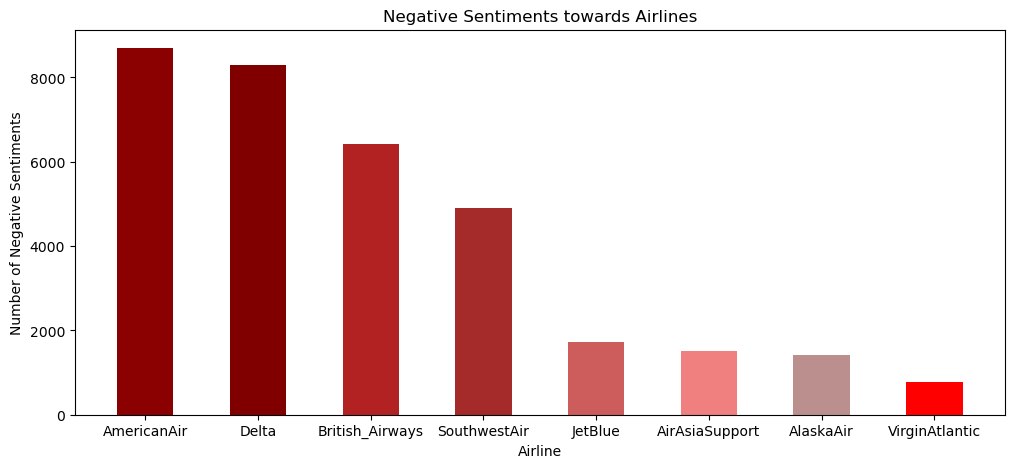

In [29]:
fig = plt.figure(figsize = (12, 5))
plt.bar(mergedCounts['Airline'], mergedCounts['Neg_Count'], color=['darkred', 'maroon', 'firebrick', 'brown', 'indianred', 'lightcoral', 'rosybrown', 'red'], width=0.5)

plt.xlabel("Airline")
plt.ylabel("Number of Negative Sentiments")
plt.title("Negative Sentiments towards Airlines")

plt.show()

## Step 6: Statistical Prediction/Modeling

<div> (1) </div>
<div> Find Most Common Words throughout all Airlines </div>

<br>
<div> (2) </div>
<div> Choose two airlines to compare and analyze </div>
<div> AmericanAir (AA) and SouthwestAir (WN) </div>
<div> AmericanAir was chosen since it had the highest Neg:Pos Sentiment Ratio vs SouthwestAir with the lowest Neg:Pos Sentiment Ratio </div>
<br>
<div> Goal is to identify most common issues and how each airline resolved it. </div>
<div> Also, understand why SouthwestAir has less negative sentiment than AmericanAir. </div>

<br>
<div> (3) </div>
<div> Looking to compare how often certain words appear between airlines </div>

<hr>

<p> MostCommon function that finds the most common words for a dataset </p>

In [75]:
def mostCommon(column):
    for text in column.values:
        for word in text.split():
            if not True in airlines.str.lower().str.contains(word):
                cnt[word] +=1

    return cnt.most_common(20)

<p> FindNegWords function that sorts the dataset to negative sentiments and then calls the MostCommon to find words </p>

In [53]:
def findNegWords(originalData, abbreviation):
    companyNegSent = originalData[originalData['sentiment_x'] == -1]
    companyNegWords = pd.DataFrame(mostCommon(companyNegSent['cleaned_text_x']))
    companyNegWords.columns = [abbreviation + 'CommonWords', abbreviation + 'Count']
    
    return companyNegWords

<p> Find most common words across all airlines </p>

In [78]:
mostCommonNegWords = findNegWords(filteredData, 'All')
mostCommonNegWords.columns = ['CommonWords', 'Count']

In [81]:
negWords = mostCommonNegWords.head(10)
negWords

,CommonWords,Count
0,flight,84791
1,delay,39764
2,britishairway,32590
3,hour,20695
4,cancel,17716
5,time,15757
6,fli,15502
7,custom,13502
8,book,13215
9,miss,13176


<h4> Based off data, we can see that the most common issues relates to flight delays and cancels. There are some issues with customs and bookings </h4>

<hr>

<p> Filter Data for both AmericanAir and SouthwestAir </p>

In [49]:
AAData = filteredData[filteredData['author_id_y'] == 'AmericanAir'].reset_index().drop(['index'], axis=1)
WNData = filteredData[filteredData['author_id_y'] == 'SouthwestAir'].reset_index().drop(['index'], axis=1)

In [50]:
AAData.head(5)

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,cleaned_text_x,wordDifference_x,response_tweet_id_x,in_response_to_tweet_id_x,sentiment_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,cleaned_text_y,wordDifference_y,response_tweet_id_y,in_response_to_tweet_id_y,sentiment_y
0,1002,115905,True,Tue Oct 31 22:02:04 +0000 2017,Ben Tennyson and an American Airlines pilot. 🎃...,ben tennyson american airline pilot 🎃 trunkort...,2,1001,NaN,0,1001,AmericanAir,False,Tue Oct 31 22:24:05 +0000 2017,"@115905 Aww, that's definitely a future pilot ...",115905 aww that definit future pilot make happ...,3,NaN,1002.0,0
1,1005,115906,True,Tue Oct 31 21:51:37 +0000 2017,"I’m sorry, what? It’s going to COST me $50 to ...",i’m it’ go cost 50 transfer 4000 aa advantage ...,9,"1003,1007",NaN,1,1003,AmericanAir,False,Tue Oct 31 22:22:37 +0000 2017,@115906 This is a great option for customers w...,115906 great option custom want share mile che...,12,1004,1005.0,1
2,1009,115907,True,Tue Oct 31 21:54:22 +0000 2017,Heading to London tonight will be there for 5 ...,head london tonight 5 day excit stuff american...,10,"1008,1010,1011,1012,1013,1014,1015,1016,1017,1...",NaN,1,1008,AmericanAir,False,Tue Oct 31 22:19:34 +0000 2017,@115907 It's always a pleasure to have you on ...,115907 alway pleasure board john wonder flight...,10,NaN,1009.0,1
3,1062,115908,True,Tue Oct 31 21:47:19 +0000 2017,Check out these tiny trick-or-treaters all dre...,check tini trickortreat dress nicu hey america...,10,"1061,1063",NaN,0,1061,AmericanAir,False,Tue Oct 31 22:17:44 +0000 2017,"@115908 Pilots, Potter, Pumpkins and Skeletons...",115908 pilot potter pumpkin skeletonsoh theyre...,3,NaN,1062.0,1
4,1065,115909,True,Tue Oct 31 21:51:36 +0000 2017,"Thank you, @AmericanAir for playing #ThisIsUs ...",americanair play thisisu great flight attend f...,8,1064,NaN,1,1064,AmericanAir,False,Tue Oct 31 22:14:35 +0000 2017,@115909 We're glad you got to kick back and en...,115909 glad got kick back enjoy show fli kind ...,9,NaN,1065.0,1


In [51]:
WNData.head(5)

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,cleaned_text_x,wordDifference_x,response_tweet_id_x,in_response_to_tweet_id_x,sentiment_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,cleaned_text_y,wordDifference_y,response_tweet_id_y,in_response_to_tweet_id_y,sentiment_y
0,1212,115925,True,Tue Oct 31 22:24:22 +0000 2017,I really hadthe WORST experience ever from sta...,realli hadthe worst experience ever start fini...,8,1211,NaN,-1,1211,SouthwestAir,False,Tue Oct 31 22:25:58 +0000 2017,@115925 We're truly sorry to hear that. Please...,115925 truli hear pm info followup vp,12,NaN,1212.0,0
1,1214,115926,True,Tue Oct 31 22:20:26 +0000 2017,Celebrated Halloween on a @southwestair flight...,celebr halloween southwestair flight pumpkin s...,6,1213,NaN,1,1213,SouthwestAir,False,Tue Oct 31 22:25:25 +0000 2017,"@115926 Happy HalloWN! Bottoms up, Risa! ^SL",115926 happi hallown bottom risa sl,1,NaN,1214.0,0
2,1216,115928,True,Tue Oct 31 22:09:15 +0000 2017,Thanks to the wonderful @SouthwestAir crews of...,wonder southwestair crew flight 1732 amp 560 s...,10,1215,NaN,1,1215,SouthwestAir,False,Tue Oct 31 22:21:27 +0000 2017,"@115928 We aim to please, Eric! Your love mean...",115928 aim eric love mean world cant wait shar...,14,NaN,1216.0,1
3,1223,115929,True,Tue Oct 31 22:08:55 +0000 2017,@SouthwestAir is down on the my account page 😑😑,southwestair account page,6,1221,NaN,0,1221,SouthwestAir,False,Tue Oct 31 22:17:35 +0000 2017,"@115929 Hm, we haven't had any reported errors...",115929 hm havent report error late tri access ...,8,"1219,1222",1223.0,1
4,1229,115932,True,Tue Oct 31 22:17:25 +0000 2017,Best part of my Halloween? Free drinks on all ...,best part halloween free drink southwestair fl...,7,1228,NaN,1,1228,SouthwestAir,False,Tue Oct 31 22:19:50 +0000 2017,"@115932 We love to give out free boos so much,...",115932 love give free boo much basic ghost hap...,7,NaN,1229.0,1


In [54]:
# Find most common words in text with negative sentiment for AA
cnt = Counter()

AANegWords = findNegWords(AAData, airlinesKey['AmericanAir'])
AANegWords.head(15)

,AACommonWords,AACount
0,flight,4009
1,delay,2014
2,hour,1095
3,fli,944
4,custom,846
5,plane,837
6,miss,782
7,time,779
8,gate,707
9,bag,705


In [55]:
# Find most common words in text with negative sentiment for WN
cnt = Counter()

WNNegWords = findNegWords(WNData, airlinesKey['SouthwestAir'])
WNNegWords.head(15)

,WNCommonWords,WNCount
0,flight,2536
1,delay,1254
2,hour,575
3,time,487
4,fli,482
5,cancel,436
6,plane,375
7,board,347
8,check,343
9,miss,321


<p> Merge the two dataframes together </p>

In [56]:
AA_WN_mergedNegWords = AANegWords.reset_index().merge(WNNegWords.reset_index(), left_on='index', right_on='index').drop(['index'],axis=1)

In [57]:
AA_WN_mergedNegWords.head(15)

,AACommonWords,AACount,WNCommonWords,WNCount
0,flight,4009,flight,2536
1,delay,2014,delay,1254
2,hour,1095,hour,575
3,fli,944,time,487
4,custom,846,fli,482
5,plane,837,cancel,436
6,miss,782,plane,375
7,time,779,board,347
8,gate,707,check,343
9,bag,705,miss,321


<h4> Based off of the merged results, we can see that the most common issue for both airlines are about flights </h4>
<h4> Looking further at the words, we can see AA had issues with delays in flights and customs </h4>
<h4> Looking at the words for WN, we can see that WN also had problems with delays in flights, but more problems with canceled flights </h4>

<hr>

<p> Find common negative words for each airline and merge together </p>

In [33]:
allMergedNegWords = pd.DataFrame()

for airline in airlines:
    cnt = Counter()
    abbreviation = airlinesKey[airline]
    
    airlineData = filteredData[filteredData['author_id_y'] == airline].reset_index().drop(['index'], axis=1)
    
    negWordsDF = findNegWords(airlineData, abbreviation)
    
    if allMergedNegWords.empty:
        allMergedNegWords = negWordsDF.copy()
    else:
        allMergedNegWords = allMergedNegWords.reset_index().merge(negWordsDF.reset_index(), left_on='index', right_on='index').drop(['index'],axis=1)

In [35]:
allMergedNegWords.head(10)

,AKCommonWords,AKCount,ASCommonWords,ASCount,AACommonWords,AACount,BACommonWords,BACount,DLCommonWords,DLCount,B6CommonWords,B6Count,WNCommonWords,WNCount,VSCommonWords,VSCount
0,flight,792,flight,740,flight,4009,britishairway,6468,flight,3995,flight,1094,flight,2536,flight,378
1,book,594,delay,413,delay,2014,flight,2907,delay,2210,delay,540,delay,1254,cancel,107
2,cancel,441,hour,200,hour,1095,delay,1013,hour,1254,hour,225,hour,575,book,101
3,115802,275,cancel,192,fli,944,book,943,time,845,time,186,time,487,seat,100
4,refund,228,time,140,custom,846,ba,820,miss,770,cancel,176,fli,482,delay,98
5,ticket,179,fli,123,plane,837,cancel,808,seat,729,fli,159,cancel,436,fli,93
6,delay,160,virginamerica,116,miss,782,tri,661,fli,690,go,132,plane,375,custom,68
7,change,155,gate,112,time,779,seat,559,plane,650,seat,125,board,347,still,67
8,bali,143,miss,110,gate,707,custom,550,bag,618,tri,120,check,343,tri,62
9,wrong,141,amp,99,bag,705,hour,547,custom,611,custom,120,miss,321,check,60


<h4> Based off this display, we can see a few common words spread across each airline relates to flight delays and cancels </h4>

<hr>

In [166]:
def findWord(originalDF, word):
    resultDF = pd.DataFrame()

    for airline in airlines:
        code = airlinesKey[airline]

        columnName = [code + 'CommonWords', code + 'Count']

        wordDF = allMergedNegWords[allMergedNegWords[columnName[0]] == word][[columnName[0], columnName[1]]]

        wordDF.columns = ['CommonWords', columnName[1]]

        if resultDF.empty:
            resultDF = wordDF.copy()
        else:
            resultDF = resultDF.merge(wordDF)
            
    return resultDF

<p> Merge column counts into one dataframe based on words </p>

In [103]:
mergedWords = pd.DataFrame()
for word in negWords['CommonWords']:
    wordDF = findWord(allMergedNegWords, word)
    
    mergedWords = pd.concat([mergedWords, wordDF])

In [164]:
mergedWords.head(10)

,CommonWords,AKCount,ASCount,AACount,BACount,DLCount,B6Count,WNCount,VSCount
0,flight,792.0,740.0,4009.0,2907.0,3995.0,1094.0,2536.0,378
0,delay,160.0,413.0,2014.0,1013.0,2210.0,540.0,1254.0,98
0,hour,NaN,200.0,1095.0,547.0,1254.0,225.0,575.0,52
0,cancel,441.0,192.0,702.0,808.0,594.0,176.0,436.0,107
0,time,110.0,140.0,779.0,457.0,845.0,186.0,487.0,50
0,fli,NaN,123.0,944.0,464.0,690.0,159.0,482.0,93
0,custom,NaN,97.0,846.0,550.0,611.0,120.0,277.0,68
2,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101
0,miss,NaN,110.0,782.0,399.0,770.0,100.0,321.0,52


<p> Graph counts for word flight for all airlines </p>

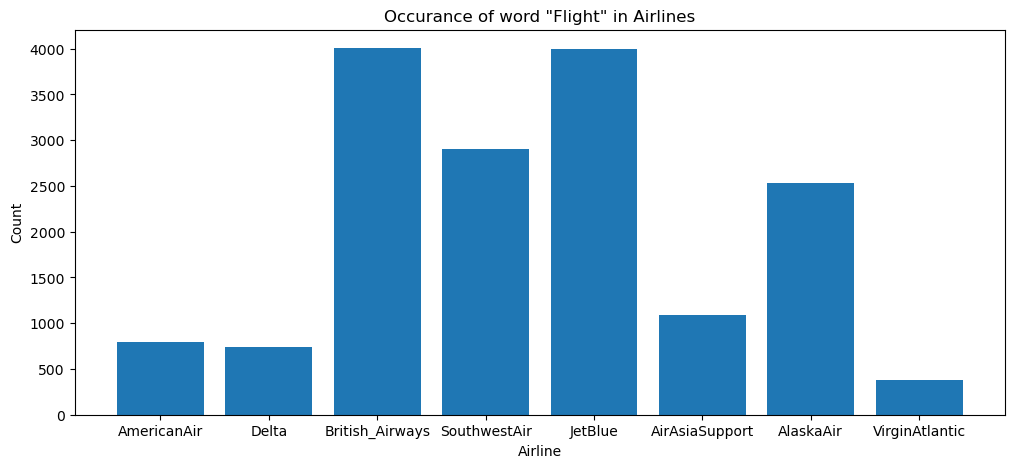

In [163]:
tableCounts = mergedWords.loc[:, mergedWords.columns != 'CommonWords'].reset_index(drop=True).iloc[0, :].reset_index(name='Count')

fig = plt.figure(figsize = (12, 5))

plt.bar(mergedCounts['Airline'], tableCounts['Count'])

plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Occurance of word "Flight" in Airlines')

plt.show()

<p> Graph counts for word delay for all airlines </p>

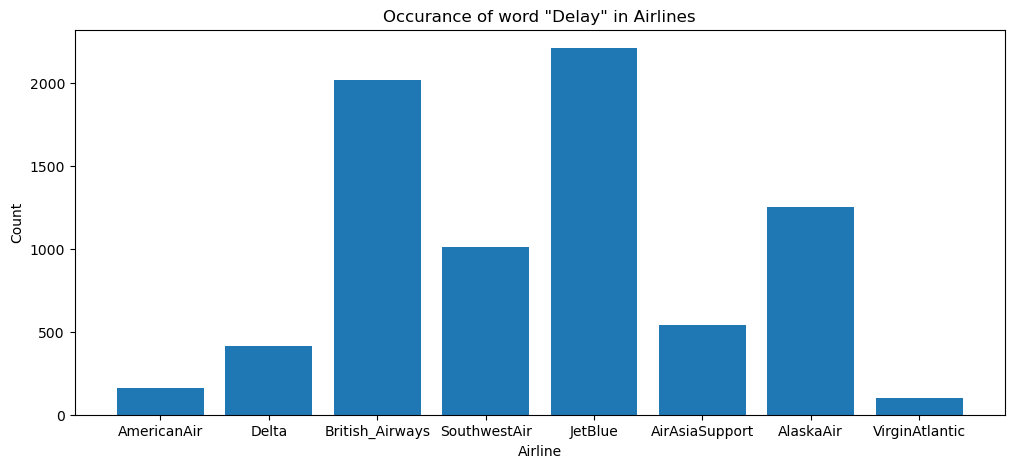

In [165]:
tableCounts = mergedWords.loc[:, mergedWords.columns != 'CommonWords'].reset_index(drop=True).iloc[1, :].reset_index(name='Count')

fig = plt.figure(figsize = (12, 5))

plt.bar(mergedCounts['Airline'], tableCounts['Count'])

plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Occurance of word "Delay" in Airlines')

plt.show()

<hr>


<h2> Step 7: Interpretation of Results </h2>

<h3> Based off of the results, it can be determined that JetBlue, BritishAirways, SouthwestAir, and AlaskaAir seems to have the most issues relating to flight delays </h3>

<hr>

## Step 8: Challenging of Results

<ul>
<li> <h3> There may be better techniques to use to solve the problem I have solved, but I believe the approach I took gave a sufficient and common issue airlines tend to have. This being conflicts with delays and cancelations of flights. </h3> </li>

<li> <h3> Other ways to analyze this data is probably figuring out the response times and how long it took to resolve a conflict of each airline. </h3> </li>

<li> <h3> I would say that there is still a little more I can use this data for in finding out conflicts with the customers and the companies. </h3> </li>
</ul>

<hr>

## Step 9: Communicate Results

In [ ]:
# USE A VISUALIZATION FORMAT TO VISUALIZE RESULTS
# EXAMPLES: TABLEAU, POWERBI, MATPLOT FIGURES

'''
TEMPLATE:
Start with your question and your problem statement
Summarize your analysis into a story.
Include the only essential analysis that adds value to your story and addresses the challenge.
Add “pretty” figures that contribute to the story.
Conclude with a summary of the important findings and any further techniques that can be explored to better answer the question.
'''

## Step 10: Data Product

In [ ]:
# TURN DATA INTO A PRODUCT
# EXAMPLES: DASHBOARDS, STREAMLIT FOR WEB APP

In [44]:
cleanedDF.to_csv('twas_cleaned.csv')

In [46]:
wrangledData.to_csv('twas_wrangled.csv')

In [45]:
filteredData.to_csv('twas_airlines.csv')